# Cost functions and evaluation metrics
## How are the algorithms trained?
We already established that our goal is to create an estimator $\hat{F}(X)$, that tries to approximate a true and unobservable function $F(X)$. In supervised learning we use a training set for which true values are given as $y$. For the same set of data our estimator gives predictions $\hat{y}$ and therefore we can calculate the prediction error $y-\hat{y}$.

There are many algorithms for finding $\hat{F}(X)$. Every one of them uses a different approach or recipe to generate the estimator. However, no matter which algorithm we use and how we go about construction of $\hat{F}(X)$ one thing remains constant. We want the prediction error to be as small as possible.

With this goal in mind we chose a cost function also called a loss function. This framing is easy to remember as we want our error to be as low as possible and hence we want to minimize cost/error/loss.

When we say we want our estimator to be as good as possible we need to optimize it. Optimization is nothing else but minimization of the cost function.

No matter what type of algorithm we use, weather there is an analytical solution or only a numerical approximation we always optimize a cost function.

## Properties of the cost function
Choosing a right function is crucial as the cost function **directly affects the our estimator $\hat{F}(X)$**. Therefore, whenever possible, we will choose a function for which it is possible to prove that our estimator is unbiased - its parameters are equal to true values.

$$E(\hat\beta)=\beta $$

In best case scenario we would also like for the loss function to create an *minimum-variance unbiased estimator (MVUE)*.

Last but not least, as optimization algorithms relay on differentiation we want the cost function to be smooth. When our estimator doesn't have this property our (numerical) optimizer may not converge at all or stop in some local minimum.

## Basic cost functions
### Mean Squared Error (MSE)
One of the most commonly used cost functions is *mean squared error (MSE)*. Well known metric used in most basic econometric method of linear regression *ordinary least squares (OLS)*.
$$MSE = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y_i})^2 $$
The reason for this method popularity is tha fact that this estimator is unbiased and efficient.

Those advantages do not meant that we can call MSE "the best cost function". One of its biggest shortcomings is the fact that it puts quite a lot of weight towards outliers.

### Mean Absolute Error (MAE)
One solution for over-weighting of outliers is using mean absolute error.
$$MAE = \frac{1}{n}\sum_{i=1}^n |y_i - \hat{y_i}| $$
However this is also not a perfect function, mainly due to the fact that it is not differentialble in zero.

## Importance of loss functions
In practical applications of machine learning we should never forget why we are engaged in predictive modeling. What is the *real* or business meaning of prediction errors? What does it mean for use, business wise, that we made a prediction error. Do we really make twice as big of a mistake when the prediction error increases two fold? Maybe it is the opposite? Maybe the bigger the prediction error the less important it is?

We can also easily imagine a situation in which the importance of our prediction error would be asymmetric. For instance in credit scoring predicting too low is not as bad as predicting too high. Similarly making a type I error can be better/worse than making type II error. In these situations we can create a custom asymmetrical cost function to incorporate this asymmetry.

To sum up a chosen cost function should always **reflect the real cost of prediction errors**.

## Cost function vs evaluation metrics
In theory it is possible to apply almost any cost function to most ML algorithms. However in most cases it would not be a successful implementation (mainly due to function being non-smooth). In practice unless there is a very strong business need for custom cost function, a basic function would be used. However we widen our knowledge about estimators using additional evaluation metrics.

We calculate evaluation metrics after the estimator is already created with use of different cost function. The **evaluation metrics do not affect the form of estimator $\hat{F}(X)$**.

Evaluation functions are usually called metrics.

## Metrics in regression
In regression problems most common metrics are:
* MSE - Mean Square Error
$$MSE = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y_i})^2 $$
* MAE - Mean Absolute Error
$$MAE = \frac{1}{n}\sum_{i=1}^n |y_i - \hat{y_i}| $$
* MedAE - Median Absolute Error - this metric is immune to over-weighting of outliers.
$$MedAE = median( |y_0 - \hat{y_0}| \dots |y_n - \hat{y_n}| )$$
* MSLE - Mean Squared Logarithmic Error - and example of an asymmetric metric the bigger the error the, relatively, lower the wieght.
$$MSE = \frac{1}{n}\sum_{i=1}^n (\log(1+y_i) - \log(1+\hat{y_i}))^2 $$
* $R^2$ - Coefficient of determination
$$R^2 \equiv 1 - {RSS \over TSS}$$
where:
$$\bar{y}=\frac{1}{n}\sum_{i=1}^n y_i$$
$$RSS=\sum_i (y_i-\hat{y_i})^2$$
$$TSS=\sum_i (y_i-\bar{y})^2$$

In case of regression problems the interpretation of the distribution of prediction error is straightforward. Most people intuitively understand what is mean square error. In any time we can plot a histogram of our prediction errors and we will be able to get a complete picture of the performance of regression estimator.

## Metrics in classification
On the other hand in classification problems it is not that easy to asses the prediction error, especially when by predictions we understand binary labels. In this case the first measure that comes to mind is accuracy. Lets see how our predictions can look like in binary classification.

![CONFMATRIX](img/confMatrix2.png)
Źródło: http://www.ritchieng.com/machine-learning-evaluate-classification-model/

Symbols:
$TP$ - true positive, $TN$ - True negatives, $FP$ - False positives, $FN$ - False negatives, $P$ - number of positives, $N$ - number of negatives

* Acc - Accuracy
$$ Acc = {(TP+TN) \over (P+N)}$$
It should be quite clear that accuracy is not a very good metric. For well balanced data sets we intuitive interpretation of accuracy is correct. however of imbalanced datasets accuracy can quickly become almost useless. Imagine a dataset in which there are ninety-nine "1" and one "0". We can get 99% accuracy by simply assigning "1" to every observation. Balanced accuracy tries to alleviate this problem.


* Bacc - Balanced Accuracy
$$ Bacc = ({TP \over P} + {TN \over N})/2$$

When we look ar "ones" and "zeros" together we can get a good picture of the performance of our estimator. We can try to look what share of labels did we get right:
* TPR - True Positive Rate - Sensitivity, Hit Rate, Recall
$$ TPR = {TP \over P} = {TP \over TP+FN}$$
* TNR (SPC) - True Negative Rate - Specificity
$$TNR = {TN \over N} = {TN \over FP+TN}$$

Another approach is to use total number of predictions in current group
* PPV - Positive Predictive Value - Precision
$$ PPV = {TP \over TP + FP}$$
* NPV - Negative Predictive Value 
$$ NPV = {TN \over TN+FN}$$

From time to time we can also see a following metric:
* F1 - f-score
$$F_1 = 2 * {(precision * recall) \over (precision + recall)}$$

A table below is a nice summary of classification metrics:
<img src="img/measuresMatrix.png">
Source: https://en.wikipedia.org/wiki/Confusion_matrix

## Evaluation in classification - cost functions and probabilities
### Logloss, cross entropy
When we look at our prediction in terms of labels we lose a very important information - what probability did the estimator assign to a given observation. All ML algorithms "work" using probabilities, rational numbers between 0 and 1, and not labels. Only at the end we chose a cut-off point and assign labels based on probabilities. For one of the "1" the probability can be equal to 0.55 and it can be 0.87 for other. We can say that in the second case the algorithm was more certain. We lose this information while working with just labels.

So lets take a look at the most important cost functions in classification. In logistic regression we were optimizing probabilities by maximizing the likelihood of observing the data in training set. In practice, due to the shape of logistic function our cost function was given as:

$$f^*_\text{Logistic}= \ln\left(\frac{p(1\mid x)}{1-p(1\mid x)}\right) = \ln\left(p(1\mid x)\right)-\ln\left(1-p(1\mid x)\right)$$

Now lets take a look at the equation for *cross entropy* in binary problem, for which the cost function will look like this:

$$J = -\frac1n\sum_{i=1}^n\ \bigg[y_i  \log \hat y_i + (1 - y_i)  \log (1 - \hat y_i)\bigg]$$

As you can see in binary classification either first or second term of the sum will be equal to zero. As our true values are either 0 or 1 we will have either $\log \hat y_i$ or $\log (1 - \hat y_i)$. Therefore the algorithm will try to get as close as possible to true probability. One can say that this function is very similar to MSLE. 

Whats more we can very simply generalize this function to a multinominal problem:

$$J = - \frac{1}{n} \sum_{i=1}^{n} \sum_{k=1}^{K} y_{i,k} \log \hat y_{i,k}$$

In this case we cannot do a (p, 1-p) "trick" so we will just look at the log of the probability of a true class. It will be zero for all other classes. This equation is usually called multinominal logloss. Main advantage is its smoothness.


### Hinge loss
In case of logloss the value of cost function changes continuously no matter weather we make good or bad predictions. Hinge loss behaves differently in that respect. We assume that our target values ar -1 or 1. Than for one observation we have

$$l(y) = \max(0, 1-y \cdot \hat y)$$

As you can see in hinge loss our loss is zero when we assign high enough probability. Therefore the algorithm focuses only on the "harder" observations to separate. This loss function is used in a fairly important algorithm *Support Vecotr Machine (SVM)*.

## Metrics for probabilities
In case of classification we do not usually use logloss nor hing loss for classification. It is very hard to interpret their values directly and almost impossible to compare between datasets. Instead we use one of the following metrics:

### ROC
* ROC - Receiver Operating Characteristic Curve
* AUC ROC - Area Under Curve - It is the area under curve ROC. Usually when we see just AUC it means AUC ROC. It takes values from 0.5 to 1. In case where we want to describe a quality of binary classification with just one number it is one of the best metrics.
<img src="img/roc.png">

Source: http://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics

ROC tells us how the values of TPR and FPR (FPR = 1 - TNR) change with the rise of the cutoff point. As you can see the curve always go to the corners of the square. At the begining when the cutoff point is 1 we classify every observation as "0". Obviously in this situation TNR = 1 (FPR  = 0). With the decrease of the cutoff point we increase the number of "1" - the TPR starts to increase. However our estimator will probably not be perfect, so some of predicted "1" are incorrect, therefore the increase of FPR (and decrease of TNR).

A perfect estimator would go from lower-bottom corner to top-right through top-left corner.

### Lift 
Lift is strictly connected to AUC. It focuses on relative performance to random estimator. Usually we plot Lift curve for deciles. One value tells the ratio of correctly predicted ones by our estimator in comparison to random estimator. A value 2.5 for second decile means that when we chose 20% of predictions with highest probabilities we predicted 50% of all "1" (TPR = 0.5)

<img src="img/lift.png">

Source: https://www.neuraldesigner.com/blog/methods-binary-classification 

The values of Lift we can read from ROC by looking vertically and comparing the value of ROC to the diagonal.

### Precision/recall curve - AUC PR
The last metric, that is recently gaining in popularity, is precision/recall curve. On one hand it is very similar to ROC, as we use the same points (ordered probabilities). However, instead of using TPR and TNR we look at TPR (Recall) and PPV (Precision).
 
<img src="img/precRecallCurve.png" width="45%">

Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

In most cases there will be little difference in the quality of our model and ranking order of models between AUC ROC and AUC PR. However, when the data set is heavily unbalanced, we should chose our metrics very carefully. The research shows that we can get very peculiar behavior. For instance, in figure below we see two algorithms working on dataset with 20 "1" and 2000 "0". The AUC ROC values are 0.813 for algorithm I and 0.875 for II, and AUC PR are 0.51 and 0.03, respectively.

<img src="img/ROCPRREC.png">
Source: Davis, J., & Goadrich, M. (2006, June). The relationship between Precision-Recall and ROC curves. In Proceedings of the 23rd international conference on Machine learning (pp. 233-240). ACM.

Small remark: you can put text in such format by selecting 'Markdown' from the list in the upper bar.

## Excercise
Lets go back to our logistic regression.


In [3]:
import pandas as pd
import numpy as np
import pickle
import statsmodels.api as sm

import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
%matplotlib inline

import gc

In [4]:
%cd C:/...
medical = pd.read_pickle("data/medical.p")

C:\...


In [ ]:
# The file includes socio-demographic data, including 
# health insurance and various aspects of health care
# touchpoints for the respondent group of a survey
# conducted in the USA.

# The collection includes 35072 observations and 27 variables:
  
# UMARSTAT – Marital status recode
# UCUREMP – Currently has employer coverage
# UCURNINS – Currently uninsured
# USATMED – Satisfied with quality of medical care
# URELATE – Number of relatives in household
# REGION – region
# STATE - state
# HHID – Household identification number
# FHOSP – In hospital overnight last year
# FDENT – Dental visits last year
# FEMER – Number of emergency room visits last year
# FDOCT – Number of doctor visits last year
# UIMMSTAT – Immigration status
# U_USBORN – U.S.- or foreign-born
# UAGE – Age topcoded
# U_FTPT – Full-time or part-time worker this year
# U_WKSLY – Weeks worked last year
# U_HRSLY – Hours worked per week last year
# U_USHRS – Hours worked per week this year
# HEARNVAL – Earnings amount last year - Household
# HOTHVAL – Household income, total exc. earnings
# HRETVAL – Retirement amount – Household
# HSSVAL – Social Security amount - Household
# HWSVAL – Wages and salaries amount – Household
# UBRACE – race
# GENDER – gender
# UEDUC3 – education level
# CEYES - color of eyes
# CHAIR - color of hair

In [5]:
mod = sm.OLS.from_formula(formula = 'U_USHRS ~ UAGE + U_WKSLY + U_HRSLY + HEARNVAL + HOTHVAL + HRETVAL + HSSVAL + ' +
                          'HWSVAL + FDENT + FEMER + FDOCT + UMARSTAT + UCUREMP + URELATE + REGION + FHOSP + UIMMSTAT + ' +
                          'U_FTPT + UBRACE + GENDER + C(UEDUC3) + CEYES + CHAIR', data = medical)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                U_USHRS   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     4142.
Date:                Fri, 18 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:42:46   Log-Likelihood:            -1.1026e+05
No. Observations:               35072   AIC:                         2.206e+05
Df Residuals:                   35032   BIC:                         2.209e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    11.2403      0.410     27.401      0.000      10.436      12.044
UMARSTAT[T.Married, do not live together]     0.8303      0.352      2.358      0.018       0.140       1.520
UMARSTAT[T.Married_live together]             0.0955      0.103      0.923      0.356      -0.107       0.298
UMARSTAT[T.Never married]                     0.5790      0.122      4.732      0.000       0.339       0.819
UMARSTAT[T.Partnership]                       0.0500      0.185      0.270      0.787      -0.312       0.412
UMARSTAT[T.Separated]                         0.2791      0.199      1.405      0.160      -0.110       0.668
UMARSTAT[T.Unknown]                          -0.6140      0.808     -0.760      0.447      -2.197       0.969
UMARSTAT[T.Widowed]                           0.5696      0.263      2.166      0.030       0.054       1.085
UCUREMP[T.Yes]                               -0.2474      0.076     -3.237      0.001      -0.397      -0.098
REGION[T.Northeast]                          -0.1911      0.087     -2.207      0.027      -0.361      -0.021
REGION[T.South]                              -0.0997      0.082     -1.216      0.224      -0.260       0.061
REGION[T.West]                               -0.1319      0.084     -1.574      0.116      -0.296       0.032
FHOSP[T.Yes]                                 -0.1287      0.119     -1.079      0.280      -0.362       0.105
UIMMSTAT[T.Foreign-born, non-citizen]        -0.3991      0.183     -2.180      0.029      -0.758      -0.040
UIMMSTAT[T.US-born citizen]                   0.2965      0.153      1.941      0.052      -0.003       0.596
U_FTPT[T.Part-time]                          -7.5472      0.100    -75.332      0.000      -7.744      -7.351
UBRACE[T.Asian/Pacific Islander]              0.0153      0.320      0.048      0.962      -0.612       0.643
UBRACE[T.Black]                               0.0104      0.274      0.038      0.970      -0.527       0.548
UBRACE[T.White]                               0.3048      0.270      1.129      0.259      -0.224       0.834
GENDER[T.Male]                                0.5987      0.066      9.014      0.000       0.469       0.729
C(UEDUC3)[T.1]                                0.2516      0.105      2.392      0.017       0.045       0.458
C(UEDUC3)[T.2]                                0.6068      0.116      5.238      0.000       0.380       0.834
CEYES[T.brown]                                0.0438      0.085      0.516      0.606      -0.122       0.210
CEYES[T.green]                                0.1628      0.113      1.441      0.150      -0.059       0.384
CEYES[T.hazel]                               -0.1141      0.103     -1.107      0.268      -0.316       0.088
CHA

In [7]:
import sklearn.metrics as metrics

preds = res.predict()
print("R^2: %.2f" % metrics.r2_score(medical["U_USHRS"].values, preds))
print("Mean squared error: %.2f" % metrics.mean_squared_error(medical["U_USHRS"].values, preds))
print("Mean absolute error: %.2f" % metrics.mean_absolute_error(medical["U_USHRS"].values, preds))

R^2: 0.82
Mean squared error: 31.50
Mean absolute error: 3.14


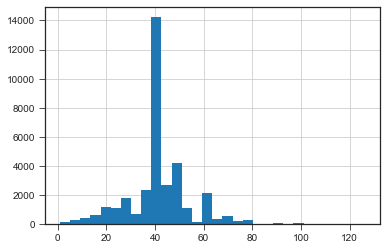

In [8]:
medical["U_USHRS"].hist(bins = 30)
plt.show()

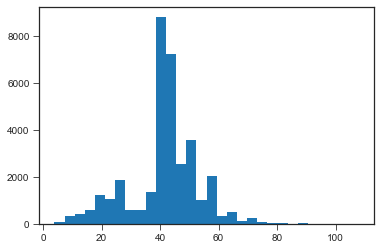

In [9]:
plt.hist(preds, bins = 30)
plt.show()

In [10]:
try:
    print("Mean squared log error: %.2f" % metrics.mean_squared_log_error(medical["U_USHRS"].values, preds))
except:
    print("Something went wrong")

Mean squared log error: 0.03


In [11]:
mod = sm.GLM.from_formula(formula = "UCURNINS ~ UMARSTAT + USATMED + URELATE + REGION + FHOSP + FDENT + FEMER + FDOCT + " +
                          "UIMMSTAT + UAGE + U_FTPT + U_WKSLY + U_USHRS + HOTHVAL + HRETVAL + HSSVAL + HWSVAL + UBRACE + " +
                          "UEDUC3 + GENDER", data = medical, family = sm.families.Binomial())
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                         
=============================================================================================
Dep. Variable:     ['UCURNINS[No]', 'UCURNINS[Yes]']   No. Observations:                35072
Model:                                           GLM   Df Residuals:                    35040
Model Family:                               Binomial   Df Model:                           31
Link Function:                                 logit   Scale:                          1.0000
Method:                                         IRLS   Log-Likelihood:                -11182.
Date:                               Fri, 18 Mar 2022   Deviance:                       22364.
Time:                                       18:45:42   Pearson chi2:                 4.22e+04
No. Iterations:                                    6                                         
Covariance Type:                           nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    -3.1098      0.208    -14.947      0.000      -3.518      -2.702
UMARSTAT[T.Married, do not live together]     0.3597      0.163      2.203      0.028       0.040       0.680
UMARSTAT[T.Married_live together]             0.8366      0.056     14.849      0.000       0.726       0.947
UMARSTAT[T.Never married]                     0.3113      0.064      4.891      0.000       0.187       0.436
UMARSTAT[T.Partnership]                      -0.3488      0.085     -4.119      0.000      -0.515      -0.183
UMARSTAT[T.Separated]                         0.0552      0.095      0.580      0.562      -0.131       0.242
UMARSTAT[T.Unknown]                          -0.7243      0.378     -1.916      0.055      -1.465       0.017
UMARSTAT[T.Widowed]                           0.1789      0.143      1.248      0.212      -0.102       0.460
REGION[T.Northeast]                           0.0397      0.056      0.705      0.481      -0.071       0.150
REGION[T.South]                              -0.7186      0.047    -15.412      0.000      -0.810      -0.627
REGION[T.West]                               -0.4015      0.049     -8.163      0.000      -0.498      -0.305
FHOSP[T.Yes]                                  0.2435      0.075      3.244      0.001       0.096       0.391
UIMMSTAT[T.Foreign-born, non-citizen]        -0.7392      0.088     -8.367      0.000      -0.912      -0.566
UIMMSTAT[T.US-born citizen]                   0.5805      0.080      7.284      0.000       0.424       0.737
U_FTPT[T.Part-time]                          -0.4990      0.058     -8.591      0.000      -0.613      -0.385
UBRACE[T.Asian/Pacific Islander]              1.0049      0.160      6.273      0.000       0.691       1.319
UBRACE[T.Black]                               0.4877      0.126      3.881      0.000       0.241       0.734
UBRACE[T.White]                               0.5185      0.117      4.418      0.000       0.288       0.748
GENDER[T.Male]                               -0.1578      0.039     -4.099      0.000      -0.233      -0.082
USATMED                                       0.3114      0.015     20.834      0.000       0.282       0.341
URELATE                                       0.0093      0.013      0.704      0.481      -0.017       0.035
FDENT                                         0.3195      0.015     21.437      0.000       0.290       0.349
FEMER                                        -0.0773      0.022     -3.519      0.000      -0.120      -0.034
FDOCT                                         0.1418      

In [77]:
probs = res.predict()
# Statsmodels took No as 1 due to alphabetic sorting.
preds = np.array([1 if x < 0.5 else 0 for x in probs])

In [13]:
pd.crosstab((medical.UCURNINS == 'Yes').astype(int), preds)

col_0         0     1
UCURNINS             
0         29291   715
1          3843  1223

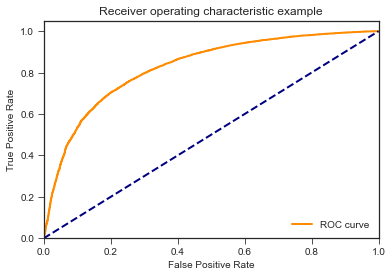

In [18]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve((medical.UCURNINS == 'No').astype(int), probs)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color = 'darkorange', lw = lw, label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = 'lower right')
plt.show()

#### For the below lift plot.

Source: https://scikit-plot.readthedocs.io/en/stable/metrics.html

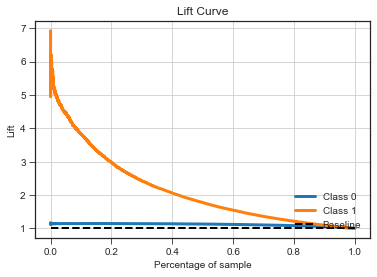

In [79]:
import scikitplot as skplt

probs2 = [[x, 1 - x] for x in probs]
skplt.metrics.plot_lift_curve(np.expand_dims(np.array((medical.UCURNINS == 'Yes').astype(int)), -1), probs2)
plt.show()

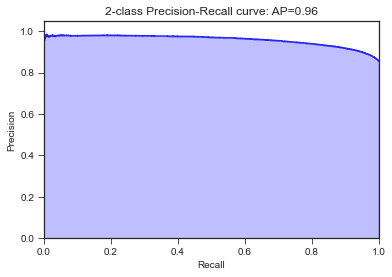

In [16]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

average_precision = average_precision_score((medical.UCURNINS == 'No').astype(int), probs)
precision, recall, _ = precision_recall_curve((medical.UCURNINS == 'No').astype(int), probs)

plt.step(recall, precision, color = 'b', alpha = 0.8, where = 'post')
plt.fill_between(recall, precision, step = 'post', alpha = 0.25, color = 'b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.show()

In [ ]:

#--------------------------------------------------------------------
# Exercises 4.

# Exercise 4.1.

# Titanic passengers data – 1310 observations and 15 variables:

# passenger_id – Unique passenger id
# pclass – Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
# survived – Survival (0 = No, 1 = Yes)
# name – Name and SUrname
# sex – Sex (0 = Male, 1 = Female)
# age – Age in years
# sibsp – # of siblings / spouses aboard the Titanic
# parch – # of parents / children aboard the Titanic
# ticket – Ticket number
# fare – Passenger fare
# cabin – Cabin number
# embarked – Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
# boat – Lifeboat (if survived)
# body – Body number (if did not survive and body was recovered)
# home.dest – Home/Destination

# For you best models from logistic regression and LDE
# Prepare Confusion matrix
# Plot a ROC Curve (with AUC)
# Plot Precision Recall Curve (with AUC)
# Calculate log loss, accuracy and balanced accuracy








In [ ]:

# Exercise 4.2.
# Wine Quality Data Set: "data/wines.csv"
# source: https://archive.ics.uci.edu/ml/datasets/wine+quality
# The file contains data on samples of white and red Portuguese wine 
# Vinho Verde. 
# Various physico-chemical characteristics of individual samples
# are available as well as wine quality scores on a point scale (0-10) 
# made by specialists.

# For you best models from multinominal logistic regression and LDE
# calcualte TPR and PPV for every class
# calcualte multinominal logloss for your best models.


